# Data Cleaning
## Gathering

In [1030]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import re
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pandas.tools import plotting
from statsmodels.formula.api import ols

In [1031]:
#load WeRateDogs Twitter data
twitter_WERATEDOGS=pd.read_csv("twitter_archive_enhanced.csv")

In [1032]:
#download mechaine learning data
url="https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
if not os.path.exists(url.split('/')[-1]):
    response=requests.get(url)
    with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)
        file.close()

In [1033]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [1034]:
#load tweet data
file_name="tweet_json.txt"
tweet_data=pd.read_json(file_name,lines=True)

In [1035]:
tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [1036]:
tweet_data['entities'][100]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'loganamnosis',
   'name': 'michael',
   'id': 154767397,
   'id_str': '154767397',
   'indices': [3, 16]},
  {'screen_name': 'dog_rates',
   'name': 'SpookyWeRateDogs™',
   'id': 4196983835,
   'id_str': '4196983835',
   'indices': [73, 83]}],
 'urls': []}

In [1037]:
tweet_data['extended_entities'][1]

{'media': [{'id': 892177413194625024,
   'id_str': '892177413194625024',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'url': 'https://t.co/0Xxu71qeIV',
   'display_url': 'pic.twitter.com/0Xxu71qeIV',
   'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 598, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}

In [1038]:
print(re.search(r'\d{18}',tweet_data['extended_entities'][1]['media'][0]['expanded_url']).group())

892177421306343426


## ASSESSING

In [1039]:
twitter_WERATEDOGS.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1040]:
twitter_WERATEDOGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1041]:
twitter_WERATEDOGS[twitter_WERATEDOGS.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1042]:
twitter_WERATEDOGS.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [1043]:
twitter_WERATEDOGS.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1044]:
twitter_WERATEDOGS.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
an            7
Bailey        7
Toby          7
Buddy         7
Scout         6
Oscar         6
Milo          6
Bella         6
Jax           6
Rusty         6
Koda          6
Dave          6
Jack          6
Leo           6
Stanley       6
very          5
           ... 
Lance         1
Dante         1
Glenn         1
Mack          1
Eriq          1
Apollo        1
Ferg          1
Cora          1
Bilbo         1
Batdog        1
Mingus        1
Scott         1
Sweet         1
Diogi         1
Edmund        1
Lucky         1
Jomathan      1
Brooks        1
Pancake       1
Jazz          1
Samsom        1
Liam          1
Anna          1
old           1
Willy         1
Gustav        1
Obie          1
Sailor        1
Harrison      1
Eleanor       1
Name: name, Length: 957,

In [1045]:
list(twitter_WERATEDOGS.text[twitter_WERATEDOGS.name=="a"])

['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \r\n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
 'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
 'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
 'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
 'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2',
 'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOB

In [1046]:
twitter_WERATEDOGS[twitter_WERATEDOGS.text.str.contains("named")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This a Norwegian Pewterschmidt ...,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None


In [1047]:
twitter_WERATEDOGS.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1048]:
twitter_WERATEDOGS.text[twitter_WERATEDOGS.rating_numerator==1776]

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [1049]:
h=twitter_WERATEDOGS.text[twitter_WERATEDOGS.rating_numerator>20]
h=list(h)
h

['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
 '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
 '@markhoppus 182/10',
 "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random 

In [1050]:
twitter_WERATEDOGS.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1051]:
list(twitter_WERATEDOGS.text[twitter_WERATEDOGS.rating_denominator<10])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [1052]:
all_columns=pd.Series(list(twitter_WERATEDOGS.doggo)+list(twitter_WERATEDOGS.floofer)+list(twitter_WERATEDOGS.pupper)+list(twitter_WERATEDOGS.puppo))
all_columns.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
dtype: int64

In [1053]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1054]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1055]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1056]:
image_predictions.p1[image_predictions.p1_dog==True].value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
cocker_spaniel                  30
malamute                        30
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              23
Siberian_husky                  20
German_shepherd                 20
Staffordshire_bullterrier       20
Cardigan                        19
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
beagle                          18
Shih-Tzu                        17
Lakeland_terrier                17
Rottweiler                      17
Italian_greyhound               16
kuvasz                          16
West_Highland_white_terrier     14
Great_Pyrenees      

In [1057]:
image_predictions[image_predictions.p1=='seat_belt']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True


In [1058]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1059]:
list(twitter_WERATEDOGS[(twitter_WERATEDOGS.doggo=='doggo') & (twitter_WERATEDOGS.pupper=='pupper')].text)

['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
 'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u',
 'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda',
 'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC',
 'Meet Maggie &amp; L

In [1060]:
tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [1061]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

#### Quality
##### Table `twitter_WERATEDOGS` 
- Tweet ID shold be string type
- in_reply and retweet ID is float, should change to integer and then transfer to string
- time-stamp is string, should be datetime type
- content source has <ahref=xxxx, > is redendant, and column should be divided into two parts, webSource and appSource
- incorrectly choose 'a','an','such' as dog's name
- miss lot's of dog's names which are after "named xxx"
- Rating numerator value forget to take float into consider, e.g 9.75 is shown 75 in table
- Rating Denominator 2 and 0 are two wrong ratings, chage revise these two rows 
- "/r/n"exists in many text


#### Tidiness
-  In table `twitter_WERATEDOGS`, last 4 columns should be combine to one colume called "dog_stage"
-  In table `image_predictions`, colums (p1, p2, p3), (p1_conf, p2_conf, p3_conf), (p1_dog, p2_dog, p3_dog) should be combined to one column for each list (dog_type, CI, dog?), and add one column "prdiction_type" contains (p1, p2, p3)
-  In table `tweet_data`, this table contains lots of redundant information, extract tweet_id, favorite_count and retweet_count to form a new table 

## Cleaning

In [1062]:
twitter_WERATEDOGS_clean=twitter_WERATEDOGS.copy()
image_predictions_clean=image_predictions.copy()
tweet_data_clean=tweet_data.copy()

### Tidyness

#### In table `twitter_WERATEDOGS`, last 4 columns should be combine to one colume called "dog_stage"

##### Definition
* combine those 4 columns into one column, if any one of four is not 'none', then use that name to represent this row

##### Code

In [1063]:
# this is code for tidyness
twitter_WERATEDOGS_clean['dog_stage']=twitter_WERATEDOGS_clean.doggo+twitter_WERATEDOGS_clean.floofer+twitter_WERATEDOGS_clean.pupper+twitter_WERATEDOGS_clean.puppo
twitter_WERATEDOGS_clean.dog_stage=twitter_WERATEDOGS_clean.dog_stage.str.replace("None","")
twitter_WERATEDOGS_clean.dog_stage=twitter_WERATEDOGS_clean.dog_stage.replace('',np.NaN)
twitter_WERATEDOGS_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Test

In [1064]:
twitter_WERATEDOGS_clean.dog_stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [1065]:
twitter_WERATEDOGS_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### In table image_predictions, colums (p1, p2, p3), (p1_conf, p2_conf, p3_conf), (p1_dog, p2_dog, p3_dog) should be combined to one column for each list (dog_type, CI, dog?), and add one column "prdiction_type" contains (p1, p2, p3)

#### Definition
use melt to transfer original columns to new one, and drop original columns

#### Code

In [1066]:
#transfer p1, p2, p3 to prediction type
x1=pd.melt(image_predictions_clean,id_vars=['tweet_id','jpg_url','img_num'],value_vars=['p1','p2','p3'],var_name='prediction_type',value_name='result')

#transfer p1_conf, p2_conf, p3_conf to prediction type and value, replace p1_conf to p1...
x3=pd.melt(image_predictions_clean,id_vars=['tweet_id','jpg_url','img_num'],value_vars=['p1_dog','p2_dog','p3_dog'],var_name='prediction_type',value_name='isDog?')
x3['prediction_type']=x3['prediction_type'].replace(['p1_dog','p2_dog','p3_dog'],['p1','p2','p3'])

#transfer p1_dog, p2_dog, p3_dog to prediction type and value, replace p1_dog to p1...
x2=pd.melt(image_predictions_clean,id_vars=['tweet_id','jpg_url','img_num'],value_vars=['p1_conf','p2_conf','p3_conf'],var_name='prediction_type',value_name='confidenceLevel')
x2['prediction_type']=x2['prediction_type'].replace(['p1_conf','p2_conf','p3_conf'],['p1','p2','p3'])

#merge x1, x2, x3 to new table
t1=pd.merge(x1,x2,on=['tweet_id','jpg_url','img_num','prediction_type'])
image_predictions_clean=pd.merge(t1,x3,on=['tweet_id','jpg_url','img_num','prediction_type'])

##### Test

In [1067]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,prediction_type,result,confidenceLevel,isDog?
1266,749395845976588288,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,1,p1,Pomeranian,0.973715,True
4761,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,p3,Boston_bull,0.000028,True
4210,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,p3,toy_poodle,0.001804,True
2942,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,p2,whippet,0.119805,True
1076,717421804990701568,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,p1,miniature_pinscher,0.286479,True
5697,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,p3,Australian_terrier,0.004451,True
3355,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,p2,miniature_poodle,0.207458,True
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,p1,Staffordshire_bullterrier,0.604938,True
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,p1,Border_collie,0.442534,True
3557,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,p2,collie,0.025188,True


In [1068]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id           6225 non-null int64
jpg_url            6225 non-null object
img_num            6225 non-null int64
prediction_type    6225 non-null object
result             6225 non-null object
confidenceLevel    6225 non-null float64
isDog?             6225 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 346.5+ KB


##### In table tweet_data, this table contains lots of redundant information, extract tweet_id, favorite_count and retweet_count to form a new table

#### Definition
create a blank list df_list, append required information for each row

#### Code

In [1069]:
df_list=[]
for i in range(len(tweet_data)):
    try:
        df_list.append({'tweet_id':re.search(r'\d{18}',tweet_data['extended_entities'][i]['media'][0]['expanded_url']).group(),
                       'favorite_count':tweet_data_clean['favorite_count'][i],
                       'retweet_count':tweet_data_clean['retweet_count'][i]})
    except (RuntimeError, TypeError, NameError):
        pass

In [1070]:
tweet_data_clean_new = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
tweet_data_clean_new.tweet_id=tweet_data_clean_new.tweet_id.astype('str')

#### Test

In [1071]:
tweet_data_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 3 columns):
tweet_id          2073 non-null object
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


In [1072]:
tweet_data_clean_new.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


### Quality

#### Tweet ID shold be string type"

##### Definition
* change Tweet ID type from int to object in both table

##### Code

In [1073]:
twitter_WERATEDOGS_clean.tweet_id=twitter_WERATEDOGS_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id=image_predictions_clean.tweet_id.astype(str)

##### Test

In [1074]:
twitter_WERATEDOGS_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [1075]:
image_predictions_clean.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

#### in_reply and retweet ID is float

##### Definition
* change to integer and then transfer to string

##### Code

In [1076]:
#in_reply_to_status_id
twitter_WERATEDOGS_clean.in_reply_to_status_id[twitter_WERATEDOGS_clean.in_reply_to_status_id.notna()]=twitter_WERATEDOGS_clean.in_reply_to_status_id[twitter_WERATEDOGS_clean.in_reply_to_status_id.notna()].astype(int).astype(str)

#in_reply_to_user_id
twitter_WERATEDOGS_clean.in_reply_to_user_id[twitter_WERATEDOGS_clean.in_reply_to_user_id.notna()]=twitter_WERATEDOGS_clean.in_reply_to_user_id[twitter_WERATEDOGS_clean.in_reply_to_user_id.notna()].astype(int).astype(str)

#retweeted_status_id
twitter_WERATEDOGS_clean.retweeted_status_id[twitter_WERATEDOGS_clean.retweeted_status_id.notna()]=twitter_WERATEDOGS_clean.retweeted_status_id[twitter_WERATEDOGS_clean.retweeted_status_id.notna()].astype(int).astype(str)

#retweeted_status_user_id
twitter_WERATEDOGS_clean.retweeted_status_user_id[twitter_WERATEDOGS_clean.retweeted_status_user_id.notna()]=twitter_WERATEDOGS_clean.retweeted_status_user_id[twitter_WERATEDOGS_clean.retweeted_status_user_id.notna()].astype(int).astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

##### Test

In [1077]:
twitter_WERATEDOGS_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: int64(2), object(12)
memory usage: 257.8+ KB


In [1078]:
twitter_WERATEDOGS_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1569,687807801670897665,NaN,NaN,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801...,11,10,Trooper,NaN
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,NaN
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,NaN
1646,683834909291606017,NaN,NaN,2016-01-04 02:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a faulty pupper. Might need to rep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909...,9,10,None,pupper
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,NaN
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,NaN
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,NaN
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,NaN
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,NaN
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,NaN


#### time-stamp is string, should be datetime type

##### Definition
* use to_datetime to change type

##### Code

In [1079]:
twitter_WERATEDOGS_clean.timestamp[1]

'2017-08-01 00:17:27 +0000'

In [1080]:
twitter_WERATEDOGS_clean.timestamp=pd.to_datetime(twitter_WERATEDOGS_clean.timestamp,format="%Y-%m-%d %H:%M:%S +0000")

twitter_WERATEDOGS_clean.retweeted_status_timestamp=pd.to_datetime(twitter_WERATEDOGS_clean.retweeted_status_timestamp,format="%Y-%m-%d %H:%M:%S +0000")

##### Test

In [1081]:
twitter_WERATEDOGS_clean.timestamp.sample(10)

572    2016-11-23 04:45:12
1586   2016-01-12 04:01:58
485    2016-12-29 21:06:41
1450   2016-02-06 03:50:33
1756   2015-12-21 02:41:11
692    2016-10-15 02:04:45
682    2016-10-19 01:29:35
2098   2015-11-28 22:15:21
1186   2016-04-08 20:46:50
1396   2016-02-17 02:54:04
Name: timestamp, dtype: datetime64[ns]

In [1082]:
twitter_WERATEDOGS_clean.retweeted_status_timestamp.sample(20)

886                    NaT
1856                   NaT
773    2016-02-19 18:24:26
2342                   NaT
569                    NaT
14                     NaT
1385                   NaT
1195                   NaT
1901                   NaT
2119                   NaT
263                    NaT
248                    NaT
615    2016-09-28 00:46:20
1317                   NaT
952                    NaT
889                    NaT
69                     NaT
1337                   NaT
1339                   NaT
640                    NaT
Name: retweeted_status_timestamp, dtype: datetime64[ns]

#### content source has <ahref=xxxx, > is redendant, and column should be divided into two parts, webSource and appSource

##### Definition
* use extract method to get correct str from source and create two columns

##### Code

In [1083]:
twitter_WERATEDOGS_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1084]:
twitter_WERATEDOGS_clean['webSource']=twitter_WERATEDOGS_clean.source.str.extract('(http.+)\" rel',expand=True)

twitter_WERATEDOGS_clean['appSource']=twitter_WERATEDOGS_clean.source.str.extract('>(.+)<',expand=True)

twitter_WERATEDOGS_clean.drop('source',axis=1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,webSource,appSource
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,http://twitter.com/download/iphone,Twitter for iPhone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,http://twitter.com/download/iphone,Twitter for iPhone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,http://twitter.com/download/iphone,Twitter for iPhone
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,http://twitter.com/download/iphone,Twitter for iPhone
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,http://twitter.com/download/iphone,Twitter for iPhone
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,http://twitter.com/download/iphone,Twitter for iPhone


##### Test

In [1085]:
twitter_WERATEDOGS_clean.webSource.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: webSource, dtype: int64

In [1086]:
twitter_WERATEDOGS_clean.appSource.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: appSource, dtype: int64

#### incorrectly choose 'a','an','such' as dog's name

##### Definition
* replace 'a', 'an', 'such' as NaN

##### Code

In [1087]:
twitter_WERATEDOGS_clean.name=twitter_WERATEDOGS_clean.name.replace(['a','an','such','None','the'],[np.nan,np.nan,np.nan,np.nan,np.nan])

##### Test

In [1088]:
twitter_WERATEDOGS_clean.name.value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Sadie        8
Bailey       7
Toby         7
Daisy        7
Buddy        7
Oscar        6
Stanley      6
Rusty        6
Scout        6
Bella        6
Dave         6
Jack         6
Jax          6
Milo         6
Koda         6
Leo          6
Sammy        5
Finn         5
Larry        5
very         5
Chester      5
            ..
Kara         1
Sparky       1
Lance        1
Dante        1
Glenn        1
Ferg         1
Harrison     1
Pherb        1
Brooks       1
Cora         1
Batdog       1
Mingus       1
Scott        1
Sweet        1
Diogi        1
Edmund       1
Lucky        1
Jomathan     1
Bilbo        1
Sailor       1
Pancake      1
Samsom       1
Liam         1
Geoff        1
Anna         1
old          1
Willy        1
Gustav       1
Obie         1
Eleanor      1
Name: name, Length: 952, dtype: int64

#### miss lot's of dog's names which are after "named xxx"

##### Definition
* use to_datetime to change type

##### Code

In [1089]:
twitter_WERATEDOGS_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1540 non-null object
dog_stage                     380 non-null object
webSource                     2356 non-null object
appSource                     2356 non-null object
dtypes: datetime64[ns](2), int64(2), object(12)
memory usage: 294.6+ KB

In [1090]:
#extract name after named, and assign this series to sereise called 'newName'
newName=twitter_WERATEDOGS_clean.text.str.extract('[nN]amed ([a-zA-Z]+)\.',expand=True)[0]

#replace name in twitter_WERATEDOGS_clean if newName exist
for x in range(len(newName)):
    if pd.notnull(newName[x]):
        twitter_WERATEDOGS_clean.name[x]=newName[x]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


##### Test

In [1091]:
newName[newName.notnull()]

603       Tickles
1853        Wylie
1955          Kip
2066        Rufus
2116        Spork
2125     Cherokee
2128        Hemry
2146      Alphred
2161      Alfredo
2166         Zeus
2191        Leroi
2204        Berta
2218         Chuk
2227         Guss
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2269      Tickles
2273         Kohl
2304         Pepe
2311    Octaviath
2314         Johm
Name: 0, dtype: object

In [1092]:
twitter_WERATEDOGS_clean.name[603]

'Tickles'

In [1093]:
twitter_WERATEDOGS_clean.name[2314]

'Johm'

#### Rating numerator value forget to take float into consider, e.g 9.75 is shown 75 in table

##### Definition
* use to_datetime to change type

##### Code

In [1094]:
twitter_WERATEDOGS_clean.rating_numerator=twitter_WERATEDOGS_clean.text.str.extract('(\d+\.?\d*)/\d',expand=True)[0].astype(float)

##### Test

In [1095]:
twitter_WERATEDOGS_clean.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

#### Rating Denominator 2 and 0 are two wrong ratings, revise these two rows

##### Definition
* Based on text of these two rows, change rating numerator and denminator to correct value

##### Code

In [1096]:
list(twitter_WERATEDOGS_clean[twitter_WERATEDOGS_clean.rating_denominator==0].text)

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

In [1097]:
twitter_WERATEDOGS_clean.rating_denominator=twitter_WERATEDOGS_clean.rating_denominator.replace(0,10)
twitter_WERATEDOGS_clean.rating_numerator=twitter_WERATEDOGS_clean.rating_numerator.replace(960,13)

In [1098]:
list(twitter_WERATEDOGS_clean[twitter_WERATEDOGS_clean.rating_denominator==2].text)

['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [1099]:
twitter_WERATEDOGS_clean[twitter_WERATEDOGS_clean.rating_denominator==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,webSource,appSource
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,1.0,2,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone


In [1100]:
twitter_WERATEDOGS_clean.rating_numerator[2335]=9
twitter_WERATEDOGS_clean.rating_denominator[2335]=10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

In [1101]:
twitter_WERATEDOGS_clean.rating_denominator.value_counts()

10     2335
11        3
50        3
80        2
20        2
15        1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
Name: rating_denominator, dtype: int64

#### "\r\n"exists in many text

##### Definition
* replace \r\n with " "

##### Code

In [1102]:
twitter_WERATEDOGS_clean.text=twitter_WERATEDOGS_clean.text.str.replace('\r\n',' ')

##### Test

In [1103]:
twitter_WERATEDOGS_clean.text.str.contains('\r\n').value_counts()

False    2356
Name: text, dtype: int64

In [1104]:
tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [1105]:
twitter_WERATEDOGS_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1563 non-null object
dog_stage                     380 non-null object
webSource                     2356 non-null object
appSource                     2356 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(12)
memory us

In [1106]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id           6225 non-null object
jpg_url            6225 non-null object
img_num            6225 non-null int64
prediction_type    6225 non-null object
result             6225 non-null object
confidenceLevel    6225 non-null float64
isDog?             6225 non-null bool
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 346.5+ KB


In [1107]:
tweet_data_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 3 columns):
tweet_id          2073 non-null object
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


## Gathering2

In [1108]:
# create a new table called image_predictions_clean2, contains tweet_id, prediction_type, 
# result, conf, isDog 5 columns and predictiontype is p1
image_predictions_clean2=image_predictions_clean[image_predictions_clean.prediction_type=='p1']

In [1109]:
image_predictions_clean2=image_predictions_clean2.drop(['jpg_url','img_num'],axis=1)

## Accessing2

In [1110]:
tweet_data_clean_new[tweet_data_clean_new.tweet_id.duplicated(keep=False)].sort_values(by=['tweet_id'])

,tweet_id,favorite_count,retweet_count
1987,667509364010450944,7118,2265
483,667509364010450944,0,2265
727,670319130621435904,0,1348
1848,670319130621435904,4087,1348
482,670444955656130560,0,2142
1831,670444955656130560,7091,2142
1745,671896809300709376,8955,4494
481,671896809300709376,0,4494
1690,673320132811366400,14374,8653
655,673320132811366400,0,8653


In [1111]:
tweet_data_clean_new[tweet_data_clean_new.tweet_id.duplicated(keep=False)].favorite_count.value_counts()

0         64
20023      1
21182      1
16251      1
10413      1
12843      1
37930      1
21161      1
38696      1
12422      1
14374      1
11268      1
95138      1
13984      1
13086      1
44456      1
27290      1
13464      1
18820      1
10771      1
7091       1
18062      1
24461      1
30604      1
35709      1
106634     1
13050      1
34822      1
24964      1
35075      1
          ..
13308      1
23675      1
49786      1
32504      1
4087       1
10295      1
28862      1
54897      1
14506      1
15725      1
36048      1
7658       1
39558      1
19173      1
18404      1
26849      1
18527      1
18484      1
13398      1
27474      1
38096      1
7118       1
23469      1
10311      1
18630      1
73157      1
17218      1
14015      1
20286      1
16444      1
Name: favorite_count, Length: 65, dtype: int64

In [1112]:
tweet_data_clean_new.describe()

,favorite_count,retweet_count
count,2073.000000,2073.000000
mean,8583.081524,2959.425953
std,12281.014912,5029.269674
min,0.000000,15.000000
25%,1665.000000,630.000000
50%,3846.000000,1401.000000
75%,10902.000000,3420.000000
max,132318.000000,79116.000000


In [1113]:
tweet_data_clean_new.favorite_count.value_counts().sort_index()

0         79
81         1
107        1
108        1
111        1
113        1
117        1
121        1
128        1
129        1
131        1
132        1
136        1
152        1
154        1
160        1
168        1
171        3
173        1
183        1
194        1
195        1
197        1
200        1
202        1
203        1
209        1
210        1
218        1
220        1
          ..
49523      1
49596      1
49786      1
50326      1
51390      1
54493      1
54793      1
54897      1
55479      1
56199      1
57371      1
58067      1
62146      1
66596      1
66833      1
70007      1
73157      1
74885      1
77714      1
78881      1
81450      1
83401      1
84753      1
94035      1
95138      1
106481     1
106634     1
107834     1
130533     1
132318     1
Name: favorite_count, Length: 1859, dtype: int64

In [1114]:
tweet_data_clean_new.retweet_count.value_counts().sort_index()

15       1
23       2
34       2
37       3
41       1
43       1
44       1
45       2
47       2
48       2
50       1
51       1
52       1
54       2
57       1
58       1
59       1
60       2
61       3
62       3
65       1
66       2
67       1
68       1
70       1
71       3
72       1
73       1
76       1
77       2
        ..
18527    1
18791    1
18813    1
18880    2
19118    1
19149    1
19188    2
19548    1
19563    1
19908    1
20400    2
21187    1
21699    2
24183    2
24997    1
27502    1
27586    1
30797    1
31140    1
31810    1
32589    1
32705    1
33230    1
40437    1
42045    2
45655    1
47958    1
52101    1
56373    2
79116    1
Name: retweet_count, Length: 1631, dtype: int64

#### Quality
##### Table `tweet_data_clean_new` 
- 128 Duplicated tweet_id, and favourite_count of half rows are 0 
- favourite_count in 79 rows are 0 


#### Tidiness
-  These three table should be combiend to one new table by tweet_id

## Cleaning 2

### Quality

##### 128 Duplicated tweet_id, and favourite_count of half rows are 0
##### favourite_count in 79 rows are 0

#### Definition
drop all rows with favorite_count == 0
#### Code

In [1115]:
tweet_data_clean_new=tweet_data_clean_new[tweet_data_clean_new.favorite_count != 0]

#### Test

In [1116]:
tweet_data_clean_new.tweet_id.value_counts()

748977405889503236    1
768473857036525572    1
817827839487737858    1
677662372920729601    1
669203728096960512    1
698355670425473025    1
673359818736984064    1
671547767500775424    1
750429297815552001    1
820749716845686786    1
835152434251116546    1
680191257256136705    1
731285275100512256    1
711743778164514816    1
720059472081784833    1
667188689915760640    1
671891728106971137    1
891815181378084864    1
672834301050937345    1
668989615043424256    1
804026241225523202    1
822244816520155136    1
687818504314159109    1
668248472370458624    1
681694085539872773    1
680801747103793152    1
691321916024623104    1
870374049280663552    1
861288531465048066    1
675349384339542016    1
                     ..
817423860136083457    1
667886921285246976    1
704364645503647744    1
796484825502875648    1
677334615166730240    1
670797304698376195    1
771500966810099713    1
672222792075620352    1
883360690899218434    1
675489971617296384    1
6682563219894517

## Tidyness

##### These three table should be combiend to one new table by tweet_id

#### Definition
merge tweet_data_clean_new and image_predictions_clean2 to twitter_WERATEDOGS_clean

#### Code

In [1117]:
twitter_archive_master=pd.merge(twitter_WERATEDOGS_clean,tweet_data_clean_new,on='tweet_id',how='left')
twitter_archive_master=pd.merge(twitter_archive_master,image_predictions_clean2,on='tweet_id',how='left')

In [1118]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

#### Test

In [1119]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,dog_stage,webSource,appSource,favorite_count,retweet_count,prediction_type,result,confidenceLevel,isDog?
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,Phineas,NaN,http://twitter.com/download/iphone,Twitter for iPhone,39492.0,8842.0,p1,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,http://twitter.com/download/iphone,Twitter for iPhone,33786.0,6480.0,p1,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,http://twitter.com/download/iphone,Twitter for iPhone,25445.0,4301.0,p1,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Darla,NaN,http://twitter.com/download/iphone,Twitter for iPhone,42863.0,8925.0,p1,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,http://twitter.com/download/iphone,Twitter for iPhone,41016.0,9721.0,p1,basset,0.555712,True


In [1120]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1563 non-null object
dog_stage                     380 non-null object
webSource                     2356 non-null object
appSource                     2356 non-null object
favorite_count                1994 non-null float64
retweet_count    

# Data Analysis

In [1121]:
twitter_archive_master['rating']=twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator

#### Compare ratings of dogs and non-dogs

In [1122]:
twitter_archive_master[twitter_archive_master['isDog?']==True].rating.describe()

count    1532.000000
mean        1.096818
std         0.179366
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         3.428571
Name: rating, dtype: float64

In [1123]:
twitter_archive_master[twitter_archive_master['isDog?']==False].rating.describe()

count    543.000000
mean       1.361393
std        7.784623
min        0.000000
25%        0.800000
50%        1.000000
75%        1.200000
max      177.600000
Name: rating, dtype: float64

- H0: ratings are inrelated to dogs or not, $\mu_1 = \mu_2$</p>
- H1: ratings are related to dogs or not, $\mu_1 \neq \mu_2$</p>

In [1124]:
rating_dog=list(twitter_archive_master[twitter_archive_master['isDog?']==True].rating)
rating_nodog=list(twitter_archive_master[twitter_archive_master['isDog?']==False].rating)

In [1125]:
# Calculate the T-test for means of two independant samples
[t_Ind,ptwo_Ind]=stats.ttest_ind(rating_dog,rating_nodog, equal_var = False)
# Show t-statistic value
t_Ind

-0.791900497686508

In [1126]:
ptwo_Ind

0.4287650045212773

if we assume significance level, $\alpha=0.05$

ptwo_Ind > 0.05, so we <strong>cannot reject H0 assumption</strong>

#### Compare ratings of different type of dogs

In [1127]:
# Only consider data with confidenceLevel higher than 0.9
twitter_dog=twitter_archive_master[(twitter_archive_master['isDog?']==True) & (twitter_archive_master.confidenceLevel>0.9)]
twitter_dog.result.value_counts()

golden_retriever                  40
Pembroke                          26
pug                               26
Samoyed                           22
Labrador_retriever                19
Pomeranian                        16
Chihuahua                         13
French_bulldog                    12
chow                               9
Blenheim_spaniel                   6
toy_poodle                         5
vizsla                             4
Brittany_spaniel                   4
American_Staffordshire_terrier     4
Shih-Tzu                           4
German_shepherd                    4
Shetland_sheepdog                  4
Bernese_mountain_dog               4
Boston_bull                        3
malamute                           3
beagle                             3
Rottweiler                         3
Old_English_sheepdog               3
Pekinese                           3
komondor                           3
Saint_Bernard                      3
basset                             3
c

#####  consider top 5 types

In [1128]:
rating_dogType={}
rating_golden_retriever=twitter_dog[twitter_dog.result=='golden_retriever'].rating
rating_Pembroke =twitter_dog[twitter_dog.result=='Pembroke'].rating
rating_pug=twitter_dog[twitter_dog.result=='pug'].rating
rating_Samoyed=twitter_dog[twitter_dog.result=='Samoyed'].rating
rating_Labrador_retriever=twitter_dog[twitter_dog.result=='Labrador_retriever'].rating

In [1129]:
rating_golden_retriever.describe()

count    40.000000
mean      1.183750
std       0.110004
min       0.800000
25%       1.175000
50%       1.200000
75%       1.225000
max       1.350000
Name: rating, dtype: float64

In [1130]:
rating_Pembroke.describe()

count    26.000000
mean      1.226923
std       0.087442
min       1.000000
25%       1.200000
50%       1.200000
75%       1.300000
max       1.400000
Name: rating, dtype: float64

In [1131]:
rating_pug.describe()

count    26.000000
mean      1.057692
std       0.196312
min       0.300000
25%       1.000000
50%       1.100000
75%       1.200000
max       1.300000
Name: rating, dtype: float64

In [1132]:
rating_Samoyed.describe()

count    22.000000
mean      1.190909
std       0.097145
min       1.000000
25%       1.100000
50%       1.200000
75%       1.300000
max       1.300000
Name: rating, dtype: float64

In [1133]:
rating_Labrador_retriever.describe()

count    19.000000
mean      1.163158
std       0.111607
min       1.000000
25%       1.100000
50%       1.200000
75%       1.250000
max       1.300000
Name: rating, dtype: float64

Text(0.5,1,'Labrador_retriever')

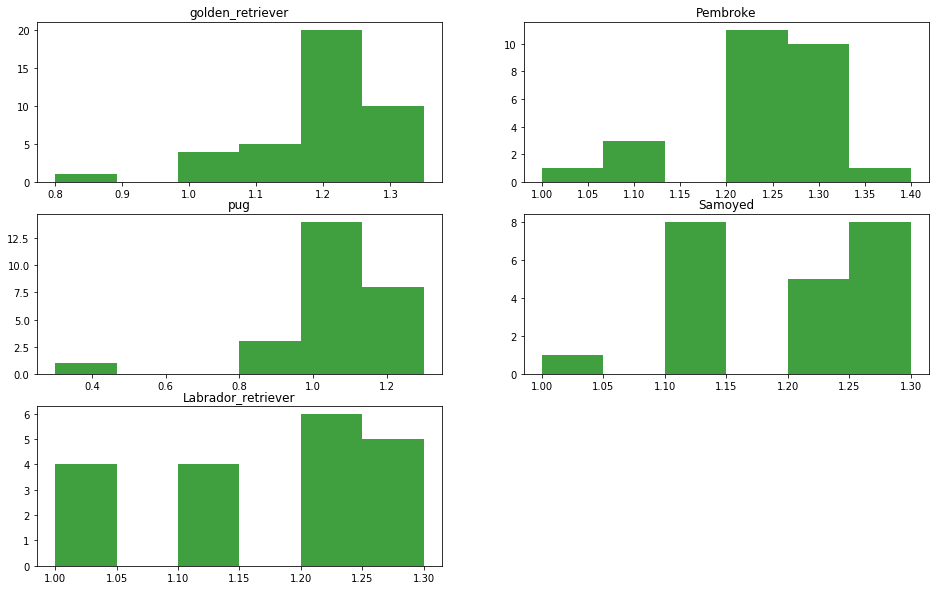

In [1134]:
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
plt.hist(rating_golden_retriever, 6, facecolor='green', alpha=0.75)
plt.title('golden_retriever')
plt.subplot(3,2,2)
plt.hist(rating_Pembroke, 6, facecolor='green', alpha=0.75)
plt.title('Pembroke')
plt.subplot(3,2,3)
plt.hist(rating_pug, 6, facecolor='green', alpha=0.75)
plt.title('pug')
plt.subplot(3,2,4)
plt.hist(rating_Samoyed, 6, facecolor='green', alpha=0.75)
plt.title('Samoyed')
plt.subplot(3,2,5)
plt.hist(rating_Labrador_retriever, 6, facecolor='green', alpha=0.75)
plt.title('Labrador_retriever')

- H0: ratings of five dogs are same. $\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$</p>
- H1: not all ratings are same</p>

In [1135]:
# f-test for all five group
stats.f_oneway(rating_golden_retriever,rating_Pembroke,rating_pug,rating_Samoyed,rating_Labrador_retriever)

F_onewayResult(statistic=6.682804324024315, pvalue=6.451695277697231e-05)

- H0: ratings of five dogs are same. $\mu_1 = \mu_2 = \mu_4 = \mu_5$</p>
- H1: not all ratings are same</p>

In [1138]:
# f-test for 4 groups, except pug
stats.f_oneway(rating_golden_retriever,rating_Pembroke,rating_Samoyed,rating_Labrador_retriever)

F_onewayResult(statistic=1.5898255783058814, pvalue=0.19638699443871585)

##### We can find that ratings of golden_retiever, Pembroke, Samoyed, Labrador_retriever  has no statistics difference, but Pug's rating is lower than other 4 popular dog types

In [1139]:
data_ratings=list(twitter_archive_master.rating[twitter_archive_master.favorite_count.notnull()])
data_favorite_count=list(twitter_archive_master.favorite_count[twitter_archive_master.favorite_count.notnull()])
data_retweet_count=list(twitter_archive_master.retweet_count[twitter_archive_master.favorite_count.notnull()])
data=pd.DataFrame({'ratings':data_ratings,'favorite_count':data_favorite_count,'retweet_count':data_retweet_count})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


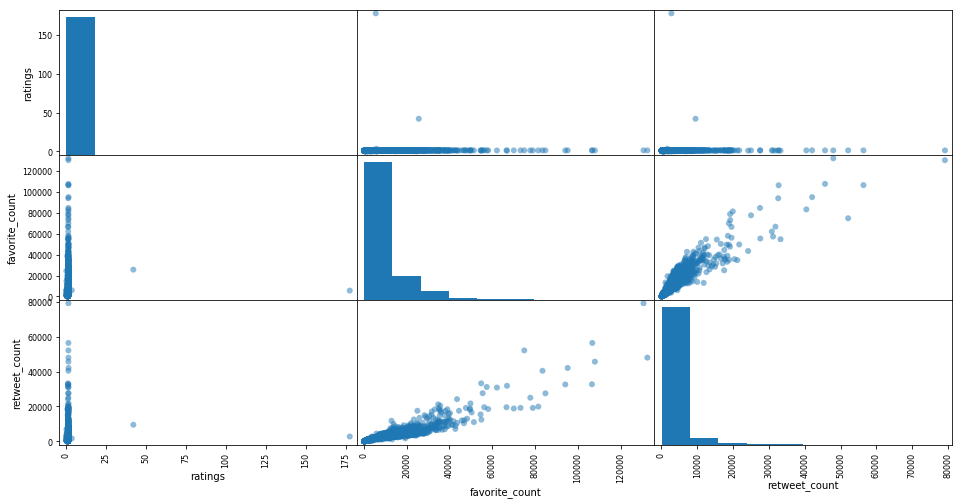

In [1140]:
# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(data, marker='o',figsize=(16, 8))

fig = plt.gcf()
#fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

In [1141]:
data.sort_values(by=['ratings'],ascending=False)

,ratings,favorite_count,retweet_count
726,177.600000,5594.0,2769.0
1718,42.000000,25673.0,9509.0
385,3.428571,5904.0,1647.0
278,1.400000,13819.0,2540.0
571,1.400000,24093.0,6425.0
1280,1.400000,35994.0,17649.0
333,1.400000,95138.0,42045.0
36,1.400000,27443.0,5836.0
332,1.400000,49786.0,21699.0
165,1.400000,25855.0,7803.0


#### three weird rating value, 177.6, 42 and 3.43, thsethree rows should be removed

In [1142]:
data=data[data.ratings<3]

In [1143]:
data.describe()

,ratings,favorite_count,retweet_count
count,1991.000000,1991.000000,1991.000000
mean,1.054813,8917.909091,2767.200904
std,0.218479,12403.490206,4717.028361
min,0.000000,81.000000,15.000000
25%,1.000000,1966.500000,619.500000
50%,1.100000,4113.000000,1345.000000
75%,1.200000,11273.000000,3202.500000
max,1.400000,132318.000000,79116.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


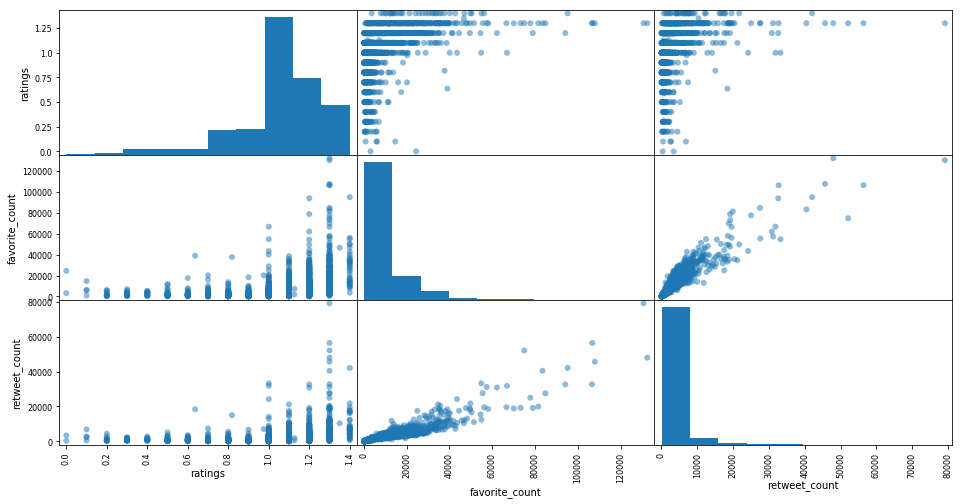

In [1144]:
# The parameter 'c' is passed to plt.scatter and will control the color)
plotting.scatter_matrix(data, marker='o',figsize=(16, 8))
fig = plt.gcf()


In [1145]:
## Without a constant

import statsmodels.api as sm

X =data["favorite_count"]
y = data["retweet_count"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Wed, 02 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:31:26   Log-Likelihood:                -17860.
No. Observations:                1991   AIC:                         3.572e+04
Df Residuals:                    1989   BIC:                         3.573e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -335.8393     52.561     -6.389      0.000    -438.920    -232.758
favorite_count     0.3480      0.003    101.115      0.000       0.341       0.355
==============================================================================
Omnibus:                     2229.873   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           547935.383
Skew:                           5.206   Prob(JB):                         0.00
Kurtosis:                      83.601   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""